<a href="https://colab.research.google.com/github/dsp196/datasets/blob/main/Custom_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


In [3]:
!wget -O chest-xray-pneumonia.zip https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f12eaf6d-6023-432f-acc9-80c9d7393433/file_downloaded

--2023-04-06 23:12:16--  https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f12eaf6d-6023-432f-acc9-80c9d7393433/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497 [following]
--2023-04-06 23:12:16--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.117.186, 52.92.0.50, 52.218.40.168, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.117.186|:

In [4]:
from zipfile import ZipFile
file_name  = "chest-xray-pneumonia.zip"

In [5]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Creating a Validation Dataset from downloaded dataset

In [6]:
import shutil
import os,random
source_dir = '/content/chest_xray/train'
destination_dir = '/content/chest_xray/val'

In [7]:
l1 = os.listdir('/content/chest_xray/train/NORMAL')
l2 = os.listdir('/content/chest_xray/train/PNEUMONIA')
print(len(l1))
print(len(l2))

1349
3884


In [8]:
classes_str =['NORMAL','PNEUMONIA']

In [9]:
for item in classes_str:
  # Get a list of all files in the source directory
  file_list = os.listdir(source_dir+ '/'+item)
  print(len(file_list))
  # Determine the number of files to move to the validation dataset
  num_files = len(file_list)  
  num_val_files = int(num_files * 0.01)

    # Choose a random subset of files to move to the validation dataset
  val_files = random.sample(file_list, num_val_files)
  if not os.path.exists(destination_dir +'/'+item):
    os.makedirs(destination_dir +'/'+item)

  for file in val_files:
    file_path = os.path.join(source_dir + '/'+item, file)
    shutil.move(file_path, destination_dir +'/'+item)

# # Move the selected files to the validation dataset directory





# file_list_NORM = os.listdir(source_dir+ '/NORMAL'

1349
3884


In [10]:
l1 = os.listdir('/content/chest_xray/val/NORMAL')
l2 = os.listdir('/content/chest_xray/val/PNEUMONIA')
print(len(l1))
print(len(l2))

13
38


##Importing Tensorflow and other vital packages

In [11]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau ,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model


from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import cv2 as cv
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
image_size =180
batch_size =64
epochs =10

In [18]:
base_dir = '/content/chest_xray/'
val_dir = '/content/chest_xray/val'
pneumonia_files = glob.glob(base_dir + '/**/PNEUMONIA/*.jpeg')
normal_files = glob.glob(base_dir + '/**/NORMAL/*.jpeg')
val_normal = glob.glob(val_dir + '/NORMAL/*.jpeg')
val_pneumonia = glob.glob(val_dir + '/PNEUMONIA/*.jpeg')

In [19]:
print('pneumonia files : {}'.format(len(pneumonia_files)))
print('normal_files : {}'.format(len(normal_files)))
print('validation_normal_files : {}'.format(len(val_normal)))
print('validation_pneumonia_files : {}'.format(len(val_pneumonia)))


pneumonia files : 4273
normal_files : 1583
validation_normal_files : 13
validation_pneumonia_files : 38


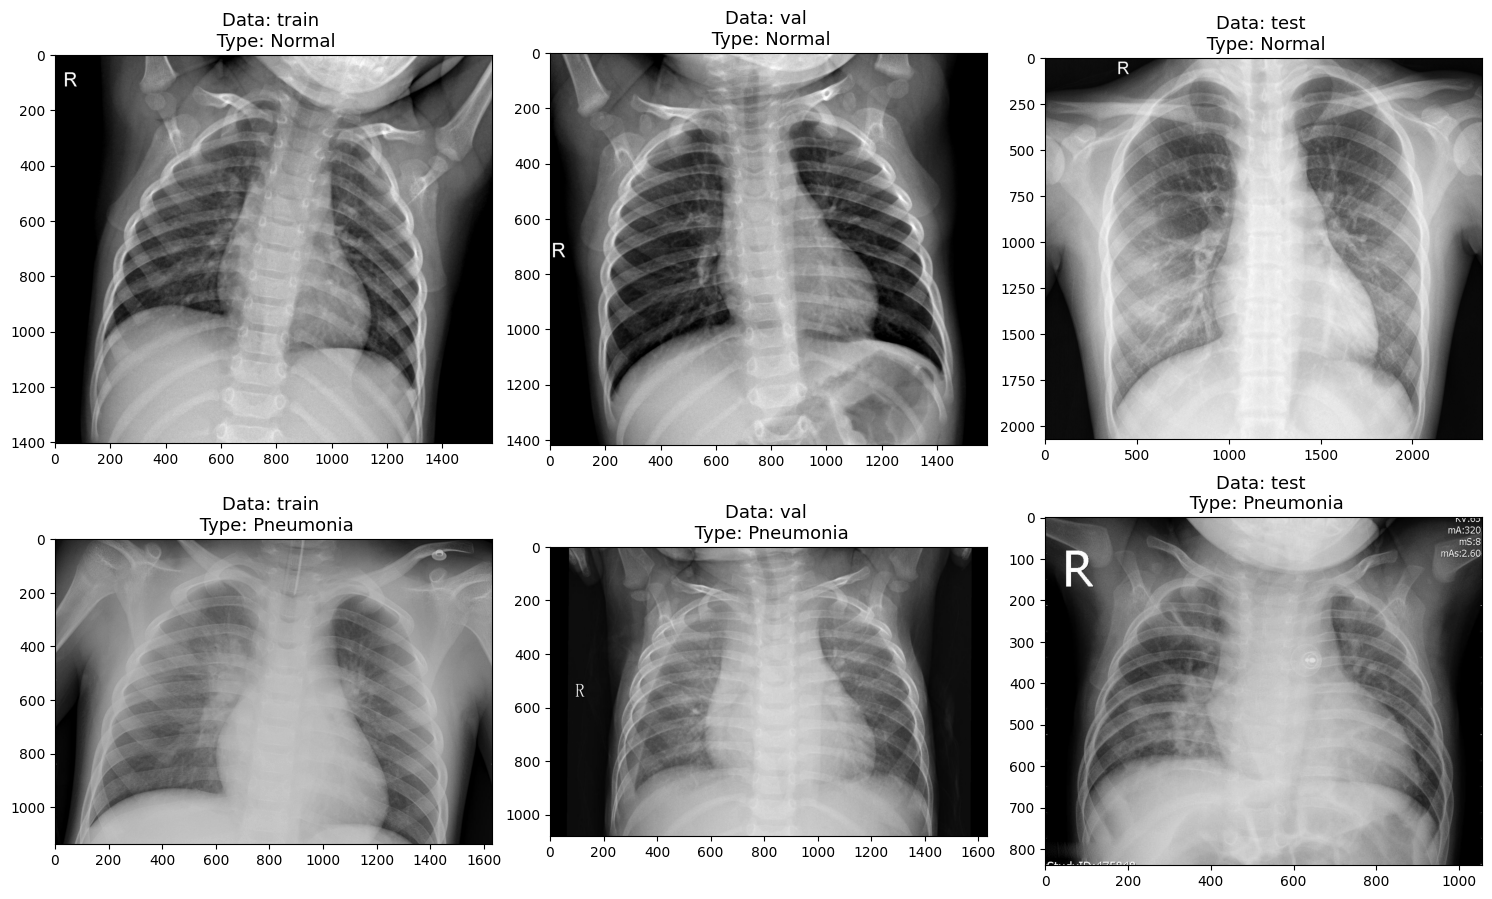

In [20]:

# Create a figure with 2 rows and 3 columns of subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
ax = ax.ravel()

# Adjust the spacing between the subplots
plt.tight_layout()

# Iterate over the train, val, and test sets
for i, dataset in enumerate(['train', 'val', 'test']):
    # Get the path of the current dataset
    dataset_path = os.path.join(base_dir, dataset)
    
    # Get the path of the first normal image in the current dataset
    normal_path = os.path.join(dataset_path, 'NORMAL', os.listdir(os.path.join(dataset_path, 'NORMAL'))[0])
    
    # Get the path of the first pneumonia image in the current dataset
    pneumonia_path = os.path.join(dataset_path, 'PNEUMONIA', os.listdir(os.path.join(dataset_path, 'PNEUMONIA'))[0])
    
    # Show the normal image in the current subplot
    ax[i].imshow(plt.imread(normal_path), cmap='gray')
    ax[i].set_title('Data: {} \n Type: Normal'.format(dataset), fontsize=13)
    
    # Show the pneumonia image in the subplot below the normal image
    ax[i+3].imshow(plt.imread(pneumonia_path), cmap='gray')
    ax[i+3].set_title('Data: {} \n Type: Pneumonia'.format(dataset), fontsize=13)

# Show the figure
plt.show()

In [21]:
# Data Splitting 
train_pneumonia , test_pneumonia = train_test_split(pneumonia_files,test_size = 0.2)
# train_pneumonia , val_pneumonia = train_test_split(train_pneumonia,test_size =0.2)

In [22]:
train_normal, test_normal = train_test_split(normal_files , test_size = 0.2)
# train_normal , val_normal = train_test_split(train_normal , test_size = 0.2)

In [23]:
# test_normal

In [24]:
print('Pneumonia files have {0} training examples ,{1} testing examples ,{2} validation examples'.format(len(train_pneumonia),len(test_pneumonia),len(val_pneumonia)))
print('Normal files have {0} training examples ,{1} testing examples ,{2} validation examples'.format(len(train_normal),len(test_normal),len(val_normal)))


Pneumonia files have 3418 training examples ,855 testing examples ,38 validation examples
Normal files have 1266 training examples ,317 testing examples ,13 validation examples


In [26]:
# adding labels (pneumonia: 1, normal: 0)
train_data = []
val_data = []
test_data = []

for sample in train_pneumonia:
    train_data.append([sample, '1'])

for sample in val_pneumonia:
    val_data.append([sample, '1'])
    
for sample in test_pneumonia:
    test_data.append([sample, '1'])
    
for sample in train_normal:
    train_data.append([sample, '0'])
    
for sample in val_normal:
    val_data.append([sample, '0'])
    
for sample in test_normal:
    test_data.append([sample, '0'])
    
# convert them into dataframes
train_df = pd.DataFrame(train_data, columns=['image', 'label'])
val_df = pd.DataFrame(val_data, columns=['image', 'label'])
test_df = pd.DataFrame(test_data, columns=['image', 'label'])

print(len(train_df), len(val_df), len(test_df))

4684 51 1172


##Creating a image generator that augments the data as well

In [27]:
train_img_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range =10,
                                   zoom_range =0.2,
                                   width_shift_range =0.1,
                                   height_shift_range =0.1)

test_img_gen = ImageDataGenerator(
    rescale=1./255
)

val_img_gen = ImageDataGenerator(
    rescale =1./255
)

In [28]:
train_set_gen = train_img_gen.flow_from_dataframe(train_df,x_col = 'image',y_col ='label',target_size=(image_size,image_size),batch_size=batch_size,shuffle =True ,class_mode ='binary',color_mode='grayscale')
test_set_gen  = test_img_gen.flow_from_dataframe(test_df,x_col = 'image',y_col = 'label',target_size= (image_size,image_size),batch_size=1,class_mode='binary',shuffle =False,color_mode='grayscale')
val_set_gen = val_img_gen.flow_from_dataframe(val_df,x_col = 'image',y_col ='label',target_size=(image_size,image_size),batch_size =batch_size,shuffle=True,class_mode='binary',color_mode ='grayscale')

Found 4684 validated image filenames belonging to 2 classes.
Found 1172 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.


In [29]:
val_set_gen

##Building the CNN model

In [30]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),input_shape = (180,180,1),activation='relu',padding ='same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

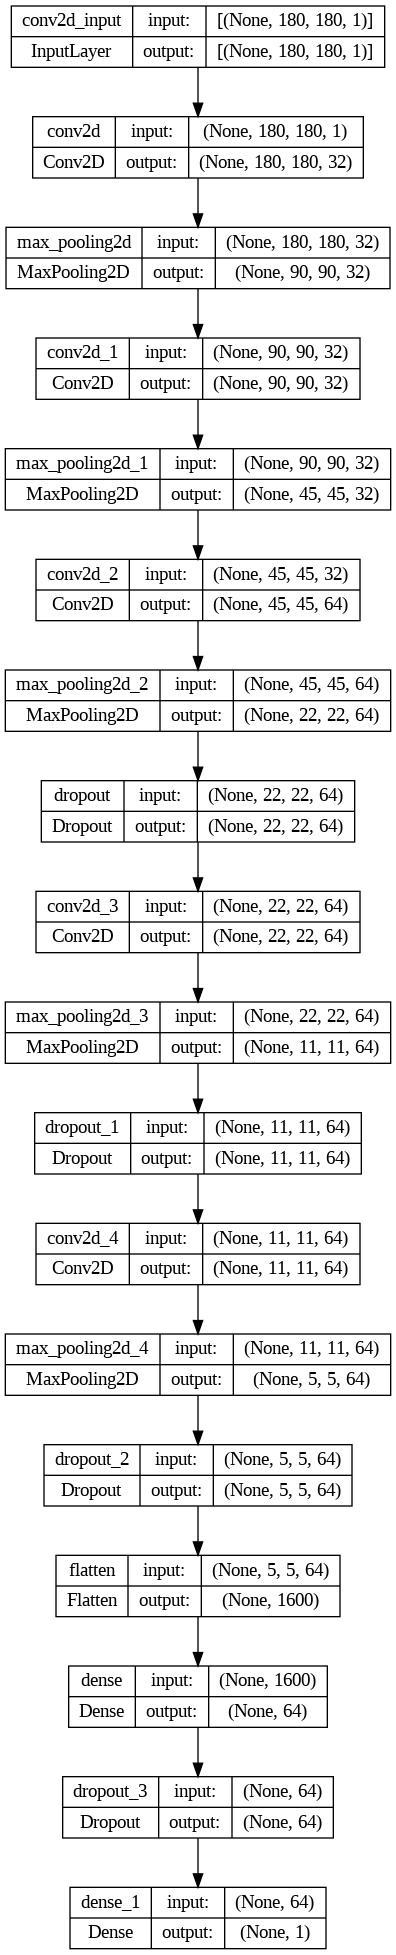

In [31]:
plot_model(model, to_file='model_flowchart.png', show_shapes=True)


In [32]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [33]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, 
                                 verbose=1,factor=0.5, min_lr=0.000001)

##Training the model for 10 Epochs

In [34]:
history = model.fit_generator(train_set_gen,
                              steps_per_epoch=len(train_set_gen),
                              epochs=epochs,
                              validation_data=val_set_gen,
                              validation_steps=len(val_set_gen),
                              callbacks=[lr_reduction])

                              

Epoch 1/10
74/74 [==============================] - 81s 907ms/step - loss: 0.5984 - accuracy: 0.7235 - val_loss: 0.5633 - val_accuracy: 0.7451 - lr: 0.0010
Epoch 2/10
74/74 [==============================] - 63s 842ms/step - loss: 0.4449 - accuracy: 0.7649 - val_loss: 0.3436 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 3/10
74/74 [==============================] - 65s 876ms/step - loss: 0.3619 - accuracy: 0.8375 - val_loss: 0.3408 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 4/10
74/74 [==============================] - 64s 867ms/step - loss: 0.3272 - accuracy: 0.8510 - val_loss: 0.3457 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 5/10
74/74 [==============================] - 63s 847ms/step - loss: 0.2950 - accuracy: 0.8721 - val_loss: 0.1374 - val_accuracy: 0.9608 - lr: 0.0010
Epoch 6/10
74/74 [==============================] - 62s 845ms/step - loss: 0.2744 - accuracy: 0.8892 - val_loss: 0.1682 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 7/10
74/74 [==============================] - 62s 841ms/st

##Evaluating the model on the test dataset

In [35]:
Predict_score  = model.evaluate(test_set_gen)
print(Predict_score)

1172/1172 [==============================] - 15s 13ms/step - loss: 0.1716 - accuracy: 0.9326
[0.17160707712173462, 0.9325938820838928]


##Plotting the accuracy and validation loss functions

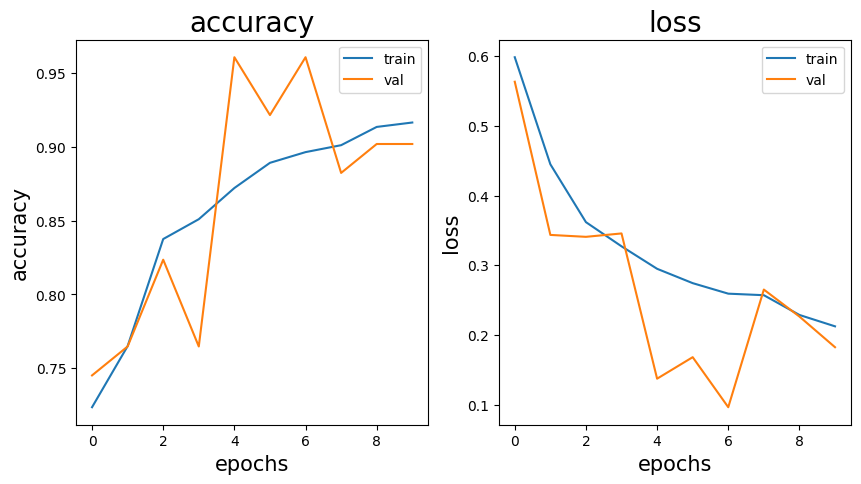

In [36]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

for i, e in enumerate(['accuracy', 'loss']):
    axis[i].plot(history.history[e])
    axis[i].plot(history.history['val_' + e])
    axis[i].set_title(e, fontsize=20)
    axis[i].set_xlabel('epochs', fontsize=15)
    axis[i].set_ylabel(e, fontsize=15)
    axis[i].legend(['train', 'val'])

## Classification confusion matrix on Test set

In [37]:
predictions=model.predict(test_set_gen)
classes_x=np.where(predictions > 0.5, 1,0)

cm = confusion_matrix(test_set_gen.classes, classes_x)

1172/1172 [==============================] - 15s 12ms/step


In [38]:
cm_pd = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

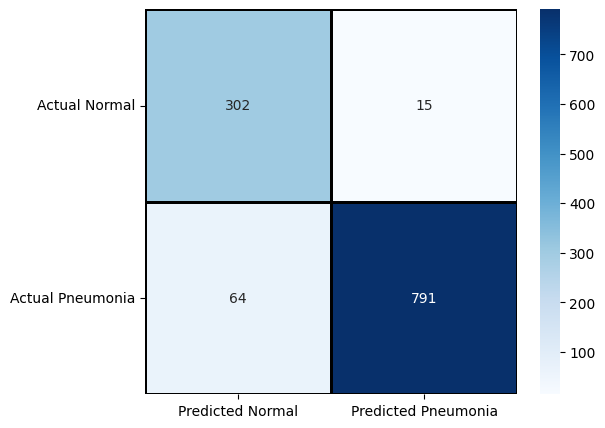

In [39]:
plt.figure(figsize = (6,5))
sns.heatmap(cm_pd,cmap= "Blues", linecolor = 'black' , 
            linewidth = 1 , annot = True, fmt='',
            xticklabels = ['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels = ['Actual Normal', 'Actual Pneumonia'])
plt.yticks(rotation=0)
plt.show()

## Classification confusion matrix on Validation set

In [40]:
predictions=model.predict(val_set_gen)
classes_x=np.where(predictions > 0.5, 1,0)

cm = confusion_matrix(val_set_gen.classes, classes_x)

1/1 [==============================] - 1s 533ms/step


In [41]:
cm_pd = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

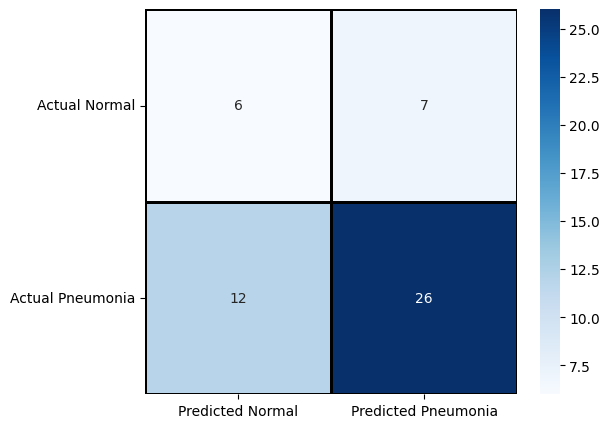

In [42]:
plt.figure(figsize = (6,5))
sns.heatmap(cm_pd,cmap= "Blues", linecolor = 'black' , 
            linewidth = 1 , annot = True, fmt='',
            xticklabels = ['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels = ['Actual Normal', 'Actual Pneumonia'])
plt.yticks(rotation=0)
plt.show()

##References


1.   Dataset - Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2
2.   Tensorflow documentation - https://docs.w3cub.com/tensorflow~2.3/keras/

